# Quantum Circuits, Introduction

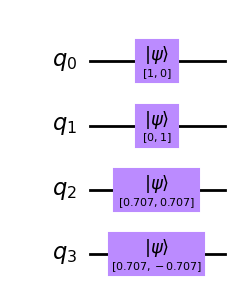

In [14]:
#Program 2.1 Initialize qubit state
from qiskit import QuantumCircuit
import math
from math import sqrt
qc = QuantumCircuit(4)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],3)
qc.draw('mpl')

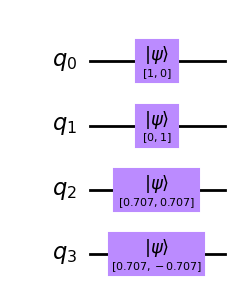

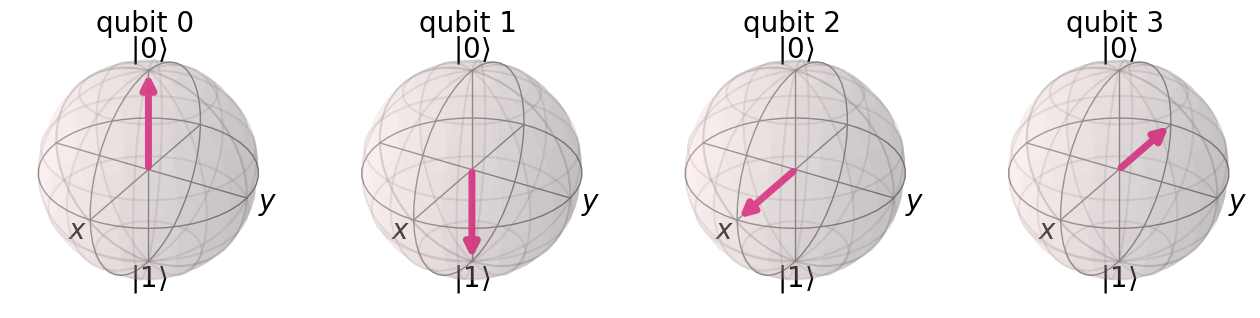

In [2]:
#Program 2.2 Initialize qubit state and show Bloch sphere
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import math
qc = QuantumCircuit(4)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],3)
state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

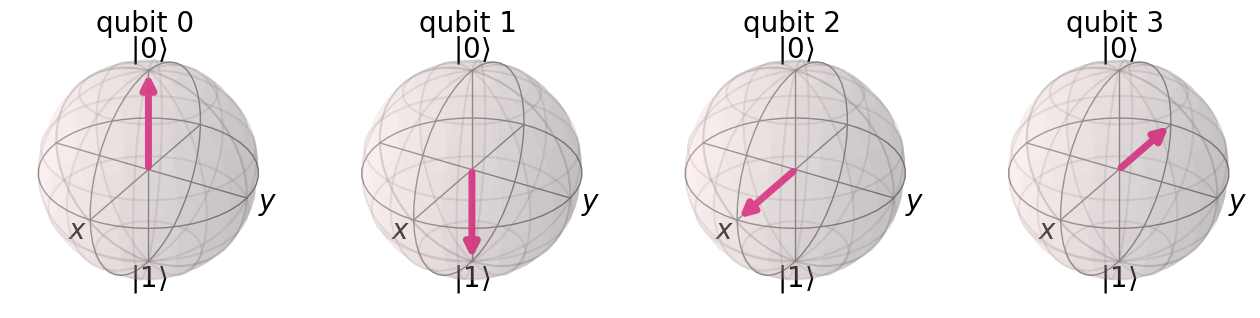

In [3]:
#Program 2.3 Show Bloch sphere
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

Total Assembly Time - 0.15306 (ms)
Total Assembly Time - 0.38290 (ms)
Total Assembly Time - 0.11206 (ms)
Total Assembly Time - 0.13900 (ms)
Total Assembly Time - 0.12708 (ms)
Total Assembly Time - 0.10490 (ms)
Total Assembly Time - 0.08798 (ms)
Total Assembly Time - 0.11015 (ms)
Total Assembly Time - 0.09322 (ms)
Total Assembly Time - 0.58889 (ms)
Total Assembly Time - 0.25320 (ms)


     ┌─────────────────┐┌─┐         
q_0: ┤ Initialize(1,0) ├┤M├─────────
     ├─────────────────┤└╥┘┌─┐      
q_1: ┤ Initialize(1,0) ├─╫─┤M├──────
     ├─────────────────┤ ║ └╥┘┌─┐   
q_2: ┤ Initialize(0,1) ├─╫──╫─┤M├───
     ├─────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0,1) ├─╫──╫──╫─┤M├
     └─────────────────┘ ║  ║  ║ └╥┘
c: 4/════════════════════╩══╩══╩══╩═
                         0  1  2  3 


Pass: ContainsInstruction - 0.00906 (ms)
Pass: UnitarySynthesis - 0.00310 (ms)
Pass: HighLevelSynthesis - 0.20719 (ms)
Pass: UnrollCustomDefinitions - 0.19884 (ms)
Begin BasisTranslator from source basis {('initialize', 1), ('measure', 1)} to target basis {'u2', 't', 'mcx', 'for_loop', 'mcry', 'save_state', 'cy', 'set_superop', 'mcr', 'x', 'cu1', 'pauli', 'save_matrix_product_state', 'kraus', 'save_probabilities_dict', 'h', 'sx', 'set_matrix_product_state', 'rzz', 'csx', 'ryy', 'cswap', 'save_superop', 'mcz', 'cx', 's', 'save_density_matrix', 'measure', 'ccx', 'u1', 'z', 'save_stabilizer', 'rxx', 'mcphase', 'diagonal', 'save_unitary', 'barrier', 'set_statevector', 'mcrx', 'qerror_loc', 'cu', 'id', 'swap', 'mcu3', 'set_stabilizer', 'mcy', 'cu3', 'initialize', 'save_statevector_dict', 'cu2', 'mcx_gray', 'roerror', 'cz', 'set_density_matrix', 'tdg', 'mcrz', 'save_clifford', 'rz', 'rzx', 'while_loop', 'y', 'mcu2', 'mcu', 'save_amplitudes_sq', 'set_unitary', 'u3', 'p', 'quantum_channel', 'r

Counts: {'1100': 1000}


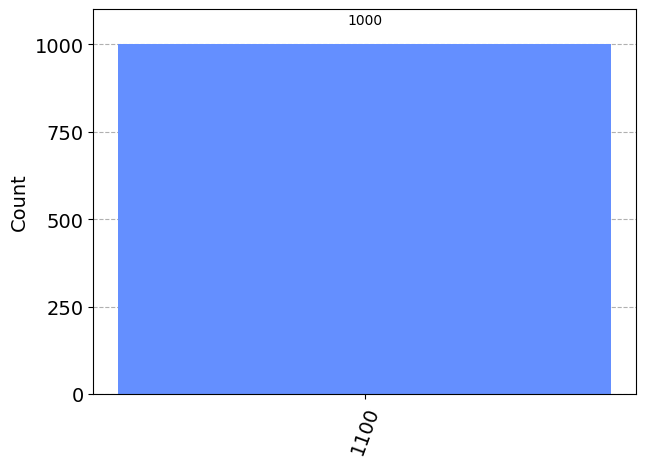

In [4]:
#Program 2.4 Measure qubit state
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(4,4)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([0,1],2)
qc.initialize([0,1],3)
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

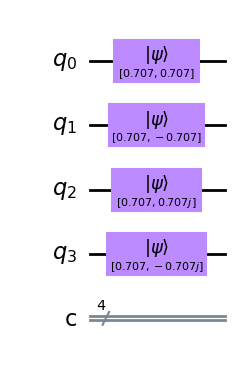

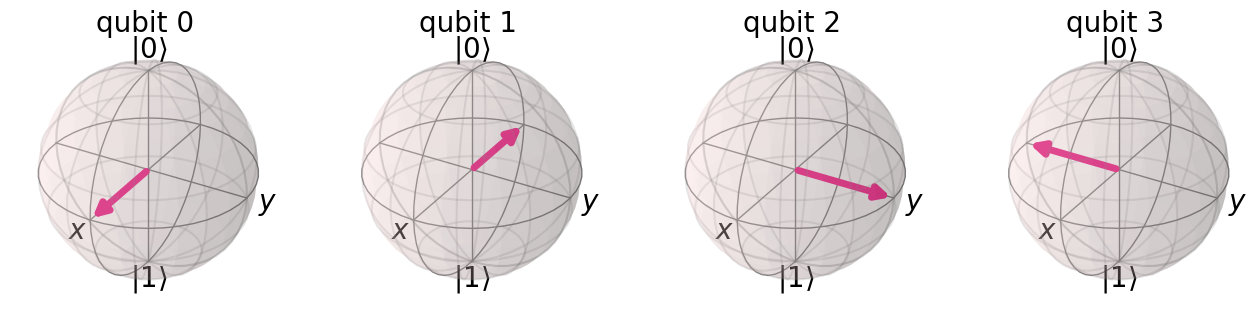

In [9]:
qc = QuantumCircuit(4,4)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],1)
qc.initialize([1/math.sqrt(2), 1j/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1j/math.sqrt(2)],3)

state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

In [10]:
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)

      ┌─────────────────────────────┐ ┌─┐         
q_0: ─┤ Initialize(0.70711,0.70711) ├─┤M├─────────
      ├─────────────────────────────┴┐└╥┘┌─┐      
q_1: ─┤ Initialize(0.70711,-0.70711) ├─╫─┤M├──────
      ├──────────────────────────────┤ ║ └╥┘┌─┐   
q_2: ─┤ Initialize(0.70711,0.70711j) ├─╫──╫─┤M├───
     ┌┴──────────────────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0.70711,-0.70711j) ├─╫──╫──╫─┤M├
     └───────────────────────────────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3 


Pass: ContainsInstruction - 0.01478 (ms)
Pass: UnitarySynthesis - 0.00286 (ms)
Pass: HighLevelSynthesis - 0.26870 (ms)
Pass: UnrollCustomDefinitions - 0.07105 (ms)
Begin BasisTranslator from source basis {('initialize', 1), ('measure', 1)} to target basis {'u2', 't', 'mcx', 'for_loop', 'mcry', 'save_state', 'cy', 'set_superop', 'mcr', 'x', 'cu1', 'pauli', 'save_matrix_product_state', 'kraus', 'save_probabilities_dict', 'h', 'sx', 'set_matrix_product_state', 'rzz', 'csx', 'ryy', 'cswap', 'save_superop', 'mcz', 'cx', 's', 'save_density_matrix', 'measure', 'ccx', 'u1', 'z', 'save_stabilizer', 'rxx', 'mcphase', 'diagonal', 'save_unitary', 'barrier', 'set_statevector', 'mcrx', 'qerror_loc', 'cu', 'id', 'swap', 'mcu3', 'set_stabilizer', 'mcy', 'cu3', 'initialize', 'save_statevector_dict', 'cu2', 'mcx_gray', 'roerror', 'cz', 'set_density_matrix', 'tdg', 'mcrz', 'save_clifford', 'rz', 'rzx', 'while_loop', 'y', 'mcu2', 'mcu', 'save_amplitudes_sq', 'set_unitary', 'u3', 'p', 'quantum_channel', 'r

Counts: {'0010': 80, '1010': 66, '1110': 56, '1111': 54, '1101': 57, '0000': 67, '1001': 56, '0101': 60, '1000': 57, '1011': 67, '0001': 62, '0011': 66, '0111': 51, '0110': 79, '1100': 62, '0100': 60}


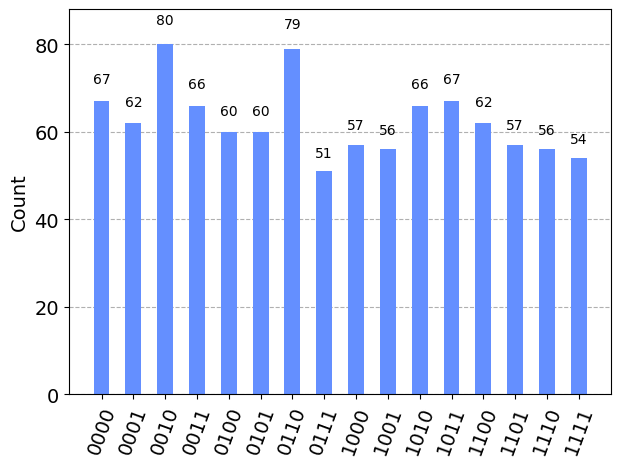

In [11]:
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Exercises
---
1. Visualize 4 qubits ,$|𝝍> = |↻↺+-> $

qc = QuantumCircuit(4,4)
qc.initialize([1/math.sqrt(2), 1j/math.sqrt(2)],0)
qc.initialize([1/math.sqrt(2), -1j/math.sqrt(2)],1)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],3)

state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

2. visualize
$$|\psi_1>=\begin{pmatrix}
-\frac{1}{2}\\
-\frac{\sqrt3}{2}i
\end{pmatrix},
|\psi_1>=\begin{pmatrix}
-\frac{2}{3}i\\
-\frac{\sqrt5}{3}
\end{pmatrix},
$$

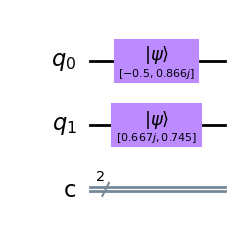

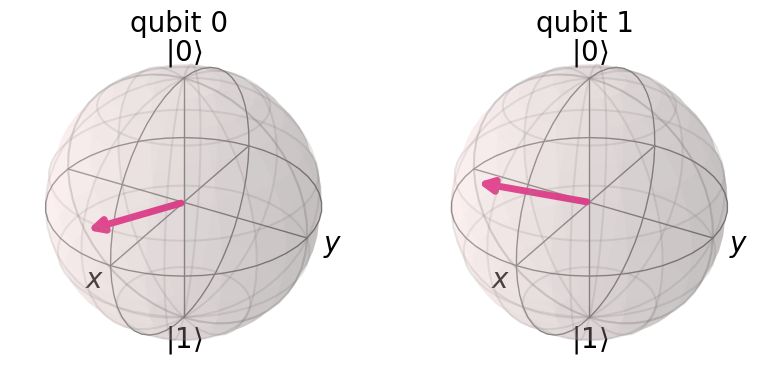

In [24]:
qc = QuantumCircuit(2,2)
qc.initialize([-1/2, 1j*sqrt(3)/2],0)
qc.initialize([1j*2/3, sqrt(5)/3],1)

state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

3. visualize
$$|\psi_1>=\begin{pmatrix}
\frac{1}{3}+\frac{2}{3}i\\
-\frac{\sqrt3}{3}+\frac{1}{3}
\end{pmatrix},
|\psi_2>=\begin{pmatrix}
\frac{1}{5}-\frac{2}{5}i\\
-\frac{2}{5}-\frac{4}{5}i
\end{pmatrix},
$$


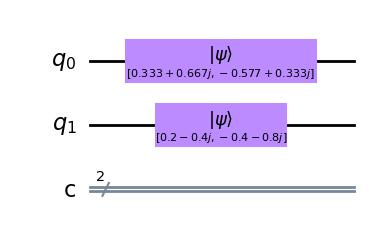

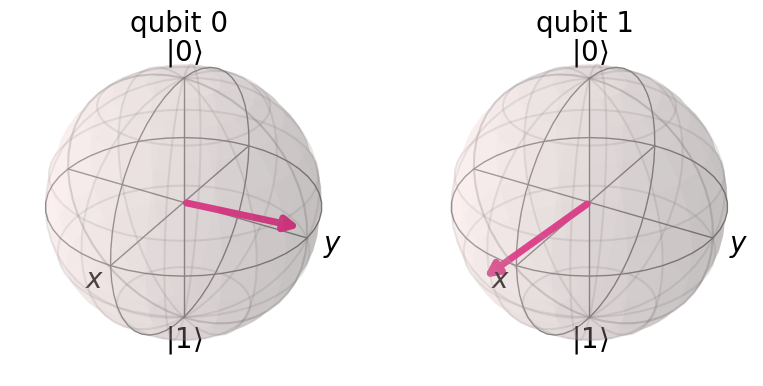

In [21]:
qc = QuantumCircuit(2,2)
qc.initialize([1/3+1j*2/3, -sqrt(3)/3+1j/3],0)
qc.initialize([(1-1j*2)/5, (-2-1j*4)/5],1)

state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

4. Consider

$$|\psi>=\begin{pmatrix}
\frac{1}{3}+\frac{2}{3}i\\
-\frac{\sqrt3}{3}+\frac{1}{3}
\end{pmatrix}
$$

Simulate 1000 quantum circuit and explain the result, why 
$$Prob(|0>)\approx \frac{5}{9}, Prob(|1>)\approx \frac{4}{9}$$

Pass: ContainsInstruction - 0.01097 (ms)
Pass: UnitarySynthesis - 0.00215 (ms)
Pass: HighLevelSynthesis - 0.18096 (ms)
Pass: UnrollCustomDefinitions - 0.05507 (ms)
Begin BasisTranslator from source basis {('initialize', 1), ('measure', 1)} to target basis {'u2', 't', 'mcx', 'for_loop', 'mcry', 'save_state', 'cy', 'set_superop', 'mcr', 'x', 'cu1', 'pauli', 'save_matrix_product_state', 'kraus', 'save_probabilities_dict', 'h', 'sx', 'set_matrix_product_state', 'rzz', 'csx', 'ryy', 'cswap', 'save_superop', 'mcz', 'cx', 's', 'save_density_matrix', 'measure', 'ccx', 'u1', 'z', 'save_stabilizer', 'rxx', 'mcphase', 'diagonal', 'save_unitary', 'barrier', 'set_statevector', 'mcrx', 'qerror_loc', 'cu', 'id', 'swap', 'mcu3', 'set_stabilizer', 'mcy', 'cu3', 'initialize', 'save_statevector_dict', 'cu2', 'mcx_gray', 'roerror', 'cz', 'set_density_matrix', 'tdg', 'mcrz', 'save_clifford', 'rz', 'rzx', 'while_loop', 'y', 'mcu2', 'mcu', 'save_amplitudes_sq', 'set_unitary', 'u3', 'p', 'quantum_channel', 'r

Counts: {'0': 559, '1': 441}


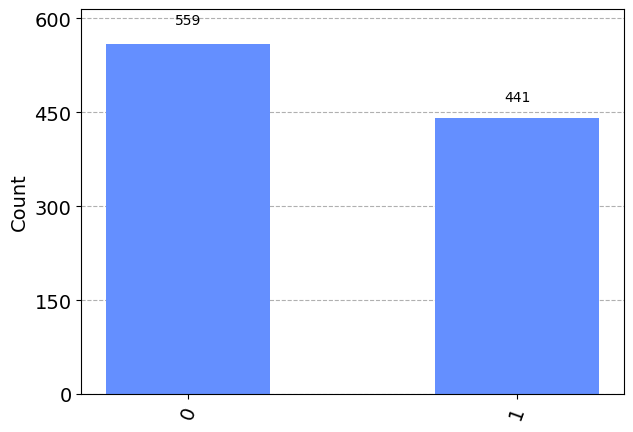

In [22]:
qc = QuantumCircuit(1,1)
qc.initialize([1/3+1j*2/3, -sqrt(3)/3+1j/3],0)
qc.measure([0],[0])
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

5. Connect any station of IBMQ lab to repeat the work above

<ipython-input-23-3064bcb01805>:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('5659b3d872ca97b9f94d75f411c8146d6a15501b0dcbad91f45d1ea1ff65081f939de4824f8632849b5d4eb87728ef549e0b7e2bc1a2014335a16adb33d546e2',overwrite=True)
__init__.discover_credentials:INFO:2023-04-18 20:09:56,048: Using credentials from qiskitrc


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
The least busy quantum computer is: ibmq_jakarta


Pass: ContainsInstruction - 0.01812 (ms)
Pass: UnitarySynthesis - 0.05817 (ms)
Pass: HighLevelSynthesis - 0.29898 (ms)
Pass: Unroll3qOrMore - 0.01597 (ms)
Pass: SetLayout - 0.01001 (ms)
Pass: TrivialLayout - 0.08488 (ms)
Pass: CheckMap - 0.85306 (ms)
Pass: FullAncillaAllocation - 0.19884 (ms)
Pass: EnlargeWithAncilla - 0.16189 (ms)
Pass: ApplyLayout - 0.40174 (ms)
Pass: ContainsInstruction - 0.01693 (ms)
Pass: CheckMap - 0.05579 (ms)
Pass: UnitarySynthesis - 0.12589 (ms)
Pass: HighLevelSynthesis - 0.26679 (ms)
Pass: UnrollCustomDefinitions - 7.66110 (ms)
Begin BasisTranslator from source basis {('measure', 1), ('rz', 1), ('reset', 1), ('ry', 1)} to target basis {'id', 'delay', 'measure', 'cx', 'x', 'snapshot', 'rz', 'sx', 'barrier', 'reset'}.
Basis translation path search completed in 0.001s.
Basis translation paths composed in 0.003s.
Basis translation instructions replaced in 0.001s.
Pass: BasisTranslator - 8.67200 (ms)
Pass: RemoveResetInZeroState - 0.05078 (ms)
Pass: Depth - 0.0550

Job Status: job has successfully run
Counts: {'0': 611, '1': 389}


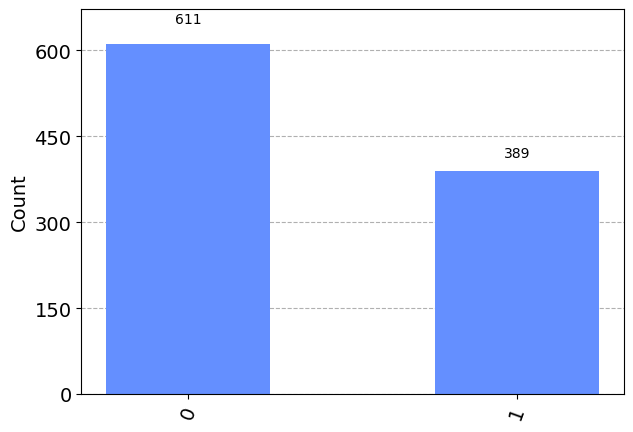

In [23]:
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.providers.ibmq import least_busy 
from qiskit.tools.monitor import job_monitor 
qc = QuantumCircuit(1,1)
qc.initialize([1/3+1j*2/3, -sqrt(3)/3+1j/3],0)
qc.measure([0],[0])
# input your token here
IBMQ.load_account()
provider=IBMQ.get_provider(group='open')
print(provider)
qcomp = least_busy(provider.backends(simulator=False))
print("The least busy quantum computer is:",qcomp)
job=execute(qc, backend=qcomp, shots=1000)
job_monitor(job)
result = job.result()
counts = result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Pass: ContainsInstruction - 0.01311 (ms)
Pass: UnitarySynthesis - 0.00167 (ms)
Pass: HighLevelSynthesis - 0.24509 (ms)
Pass: UnrollCustomDefinitions - 0.09489 (ms)
Begin BasisTranslator from source basis {('initialize', 1), ('measure', 1)} to target basis {'u2', 't', 'mcx', 'for_loop', 'mcry', 'save_state', 'cy', 'set_superop', 'mcr', 'x', 'cu1', 'pauli', 'save_matrix_product_state', 'kraus', 'save_probabilities_dict', 'h', 'sx', 'set_matrix_product_state', 'rzz', 'csx', 'ryy', 'cswap', 'save_superop', 'mcz', 'cx', 's', 'save_density_matrix', 'measure', 'ccx', 'u1', 'z', 'save_stabilizer', 'rxx', 'mcphase', 'diagonal', 'save_unitary', 'barrier', 'set_statevector', 'mcrx', 'qerror_loc', 'cu', 'id', 'swap', 'mcu3', 'set_stabilizer', 'mcy', 'cu3', 'initialize', 'save_statevector_dict', 'cu2', 'mcx_gray', 'roerror', 'cz', 'set_density_matrix', 'tdg', 'mcrz', 'save_clifford', 'rz', 'rzx', 'while_loop', 'y', 'mcu2', 'mcu', 'save_amplitudes_sq', 'set_unitary', 'u3', 'p', 'quantum_channel', 'r

      ┌─────────────────────────────┐ ┌─┐         
q_0: ─┤ Initialize(0.70711,0.70711) ├─┤M├─────────
      ├─────────────────────────────┴┐└╥┘┌─┐      
q_1: ─┤ Initialize(0.70711,-0.70711) ├─╫─┤M├──────
      ├──────────────────────────────┤ ║ └╥┘┌─┐   
q_2: ─┤ Initialize(0.70711,0.70711j) ├─╫──╫─┤M├───
     ┌┴──────────────────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0.70711,-0.70711j) ├─╫──╫──╫─┤M├
     └───────────────────────────────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3 
Counts: {'1110': 62, '1010': 66, '0101': 57, '1111': 73, '1101': 56, '0111': 69, '1001': 69, '1011': 56, '0011': 65, '0001': 54, '0110': 60, '0100': 61, '1100': 73, '1000': 55, '0010': 71, '0000': 53}


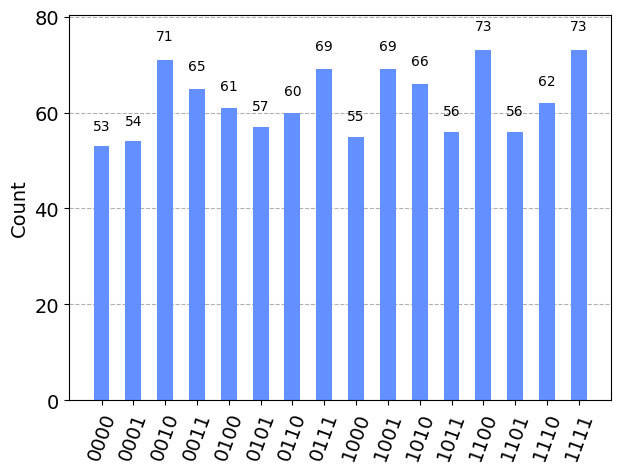

In [5]:
#Program 2.5 Measure qubit state again
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
qc = QuantumCircuit(4,4)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],1)
qc.initialize([1/math.sqrt(2), 1j/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1j/math.sqrt(2)],3)
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)